# Network of networks

Networks where created, this networks have topologies and functions. The topological and dynamic distance was compared.

Each network has a name that corresponds to: 
* MOTIF: motif of network
* ID, ID: parameter of order
* MODEL: Number of model/function

Only comparisons between different networks where taken into account.

In [1]:
# Import
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  

Color code

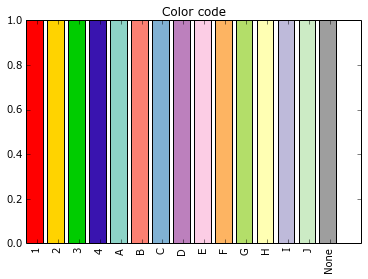

In [2]:
from collections import OrderedDict

colors = {
    '1' : '#FF0000', '2' : '#FFD300', 
    '3' : '#00CC00', '4' : '#3914AF', 
    'A' : '#8dd3c7', 'B' : '#fb8072', 'C' : '#80b1d3',
    'D' : '#bc80bd', 'E' : '#fccde5', 'F' : '#fdb462',
    'G' : '#b3de69', 'H' : '#ffffb3', 'I' : '#bebada',
    'J' : '#ccebc5', 'None' : '#9e9e9e'}
colors = OrderedDict(sorted(colors.items(), key=lambda t: t[0]))


plt.bar(range(len(colors)), [1]*len(colors), color=colors.values() )
plt.title("Color code")
plt.xticks(np.arange(0.5,len(colors)+.5,1), list(colors.keys()), rotation='vertical')
plt.show()

## Distance distribution

Distribution of topological distances

Create histograms

In [3]:
#hist_Dtop = {}
#hist_Ddyn = {}
#hist_DvsD = {}

#with open("5nodos/crossdistances.out") as f:
#    for line in f:
#        line = line.strip().split(',')
#        line = [int(l) for l in line]
#        if line[2] in hist_Dtop: hist_Dtop[line[2]] += 1
#        else: hist_Dtop[line[2]] = 1
#        if line[3] in hist_Ddyn: hist_Ddyn[line[3]] += 1
#        else: hist_Ddyn[line[3]] = 1
#        if (line[2], line[3]) in hist_DvsD: hist_DvsD[(line[2], line[3])] += 1
#        else: hist_DvsD[(line[2], line[3])] = 1

#sorted(hist_Dtop, key=lambda key:hist_Dtop[key])
#sorted(hist_Ddyn, key=lambda key:hist_Ddyn[key])
#sorted(hist_DvsD, key=lambda key:hist_DvsD[key])

#with open('5nodos/hist_Dtop', 'wb') as f: pickle.dump(hist_Dtop, f)
#with open('5nodos/hist_Ddyn', 'wb') as f: pickle.dump(hist_Ddyn, f)
#with open('5nodos/hist_DvsD', 'wb') as f: pickle.dump(hist_DvsD, f)
    
with open('5nodos/hist_Dtop', 'rb') as f: hist_Dtop = pickle.load(f)
with open('5nodos/hist_Ddyn', 'rb') as f: hist_Ddyn = pickle.load(f)
with open('5nodos/hist_DvsD', 'rb') as f: hist_DvsD = pickle.load(f)

print(' ')

In [23]:
n, mean = 0, 0
for key, value in hist_Ddyn.items():
    mean += key*value
    n += value
mean/n

235.76279330281002

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


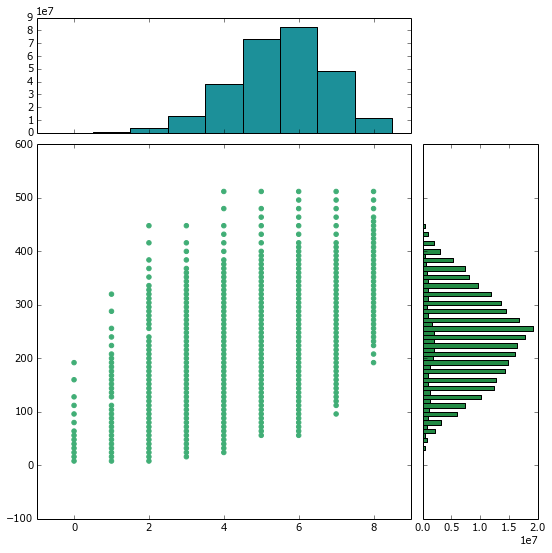

In [52]:
from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
x = [d[0] for d in hist_DvsD.keys()]
y = [d[1] for d in hist_DvsD.keys()]
axScatter.scatter(x, y, color='#41ae76')

# now determine nice limits by hand:
xwidth = 1.0
ywidth = 8.0
xkeys = [x-xwidth/2 for x in list(hist_Dtop.keys())]
ykeys = [y-ywidth/2 for y in list(hist_Ddyn.keys())]
axHistx.bar(xkeys, list(hist_Dtop.values()), width=xwidth, color='#1c9099')
axHisty.barh(ykeys, list(hist_Ddyn.values()), height=ywidth, color='#238b45')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

#plt.savefig('2PLN_DtopVsDdyn.svg')
plt.show()

Por que todas las distancias dinámicas son multiplos de 8?

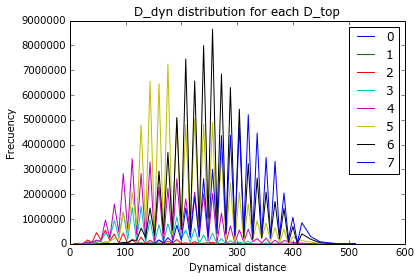

In [5]:
for i in range(8): 
    Ddist = []
    for d, c in hist_DvsD.items():
        if d[0] == i: Ddist.append( [d[1],c] )
    Ddist = sorted(Ddist,key=lambda x: x[0])
    plt.plot([d[0] for d in Ddist], [d[1] for d in Ddist], label=str(i))

plt.title("D_dyn distribution for each D_top")
plt.xlabel("Dynamical distance")
plt.ylabel("Frecuency")
plt.legend()
plt.show()

Pearson correlation coefficient

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.

In [6]:
from scipy.stats.stats import pearsonr   
pearsonr(x,y)

(0.46197765082183251, 3.1820770251020825e-21)

## Funtional Loops

Distribution of fun_loops by motif

    C GEN4 +
    D GEN3 +
    E GEN3 + GEN4 +
    F GEN3 GEN4 + GEN3 +
    G GEN3 GEN4 - GEN3 +
    H GEN3 GEN4 + GEN4 +
    I GEN3 GEN4 - GEN4 +
    J GEN1 GEN2 - GEN1 +

In [7]:
import pandas as pd

loops = {}
df_loops = pd.DataFrame(index=[1,2,3,4], columns=['C','D','E','F','G','H','I','J'])
df_loops = df_loops.fillna(0)
with open("5nodos/Loops_Functionality.csv") as f:
    for line in f.readlines(): 
        line = line.strip().split(',')
        if line[-1] != '': 
            loops[int(line[0])] = line[1]
            m = int(line[0][0])
            df_loops[line[1]][m] += 1    
df_loops

C    D  E  F  G   H   I   J
1  184  172  8  8  8  20  20  16
2  184  172  8  8  8  20  20  16
3  188  180  8  8  8  20  20  16
4  188  180  8  8  8  20  20  16

Este patrón esta raro, por que todos los motifs tienen una distribución similar de loops funcionales, para 3 nodos no fue asi. 

## Network

Create edge list fot Threshold D_top=0 and D_dyn=8

In [8]:
#f = open("5nodos/edges_Dtop0.csv", 'w')
#g = open("5nodos/edges_Ddyn8.csv", 'w')

#with open("5nodos/crossdistances.out") as h:
#    for line in h:
#        line = line.strip().split(',')
#        if line[2] == '0': 
#            f.write(line[0] +',' +line[1] +',' +line[3] +'\n')
#        if line[3] == '8': 
#            g.write(line[0] +',' +line[1] +',' +line[2] +'\n')

#f.close()
#g.close()

Create network D_top=0

In [9]:
G = nx.read_edgelist('5nodos/edges_Dtop0.csv', delimiter=',', nodetype=int, data=(('weight',int),))

#Default properies
for n in G.nodes(): 
    G.node[n]['loop']=''
    G.node[n]['color']=colors['None']
    G.node[n]['motif']=str(n)[0]
#Add functional loops data
for n, l in loops.items():
    G.node[n]['loop']=l
    G.node[n]['color']=colors[l]

len(G.nodes(data=True))

20388

In [25]:
n, mean = 0, 0
for e1, e2 in G.edges():
    mean += G[e1][e2]['weight']
    n += 1
mean / n

0.3382352941176471

Separate in components and determine loops by component

In [10]:
data = []
for sg in nx.connected_components(G):
    l = []
    for n in sg:
        m = int(str(n)[0])
        l.append(  G.node[n]['loop']  )
    l = ''.join(sorted(l, reverse=True))
    data.append([m, len(sg), l])
len(data)

loops_comb = [d[2] for d in data]
loops_comb = {l:loops_comb.count(l) for l in set(loops_comb)}
del loops_comb[''] #remove non-loops
loops_comb = OrderedDict(sorted(loops_comb.items(), key=lambda t: t[0]))
len(loops_comb)

15

Plot loops by motif

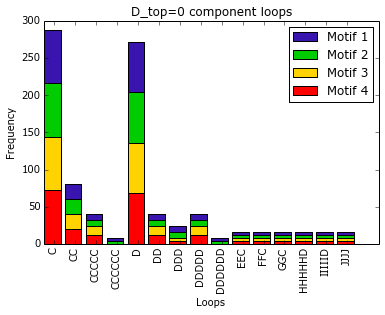

In [11]:
loops_by_motif = np.zeros((5,len(loops_comb)))
ordl = {loop:i for i, loop in enumerate(loops_comb.keys())}
for m, s, l in data: #separate loops by motif
    if l != '': loops_by_motif[m, ordl[l]] += 1
for i in range(1,len(loops_by_motif)): #Add previus motifs for plotting
    loops_by_motif[i] += loops_by_motif[i-1]
#loops_by_motif

ind = np.arange(0,len(loops_comb),1)
p = []
for i in reversed(range(1,5)):
    p.append( plt.bar(ind,loops_by_motif[i], color=colors[str(i)]) )

plt.title("D_top=0 component loops")
plt.xlabel("Loops")
plt.xticks(ind+0.5, list(loops_comb.keys()), rotation='vertical')
plt.ylabel("Frequency")
plt.legend((p[0][0], p[1][0], p[2][0], p[3][0]), ('Motif 1','Motif 2','Motif 3','Motif 4'))

plt.show()

Functions are equally distributed across motifs.

Determine the functional loops present in the different components by size

In [12]:
sizes = [d[1] for d in data]
sizes = {s:sizes.count(s) for s in set(sizes)}
sizes = OrderedDict(sorted(sizes.items(), key=lambda t: t[0]))
#sizes

distribution = [(d[1],d[2]) for d in data]
distribution = {d:distribution.count(d) for d in set(distribution)}
distribution

{(2, ''): 1696,
 (2, 'C'): 208,
 (2, 'D'): 208,
 (3, ''): 632,
 (3, 'C'): 48,
 (3, 'D'): 32,
 (4, ''): 276,
 (4, 'C'): 16,
 (4, 'CC'): 32,
 (4, 'D'): 16,
 (4, 'DD'): 24,
 (4, 'EEC'): 16,
 (4, 'FFC'): 16,
 (4, 'GGC'): 16,
 (5, ''): 548,
 (5, 'CC'): 24,
 (5, 'DDD'): 8,
 (6, ''): 136,
 (6, 'DDD'): 16,
 (6, 'JJJJ'): 16,
 (7, ''): 276,
 (7, 'C'): 16,
 (7, 'CC'): 8,
 (7, 'CCCCC'): 12,
 (7, 'D'): 16,
 (7, 'DDDDD'): 4,
 (8, 'CCCCCC'): 4,
 (8, 'DDDDDD'): 4,
 (8, 'HHHHHD'): 16,
 (8, 'IIIIID'): 16,
 (9, ''): 136,
 (9, 'CC'): 4,
 (9, 'CCCCC'): 4,
 (9, 'DD'): 4,
 (9, 'DDDDD'): 4,
 (10, ''): 88,
 (10, 'CCCCC'): 16,
 (10, 'DDDDD'): 24,
 (11, ''): 36,
 (11, 'CCCCC'): 8,
 (11, 'CCCCCC'): 4,
 (11, 'DDDDD'): 8,
 (11, 'DDDDDD'): 4,
 (12, ''): 40,
 (13, 'CC'): 4,
 (13, 'DD'): 4,
 (14, ''): 16,
 (14, 'CC'): 8,
 (14, 'DD'): 8,
 (21, ''): 16,
 (48, ''): 24}

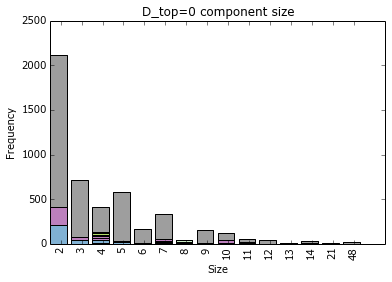

In [13]:
ordl = {loop:i for i, loop in enumerate(loops_comb.keys())}
ords = {size:i for i, size in enumerate(sizes.keys())}
loops_by_size = np.zeros( (len(ordl)+1, len(ords)) )

for m, s, l in data: #separate loops by motif
    if l != '': 
        #print(l, ordl[l], s, ords[s])
        loops_by_size[ordl[l]+1, ords[s]] += 1
for i in range(1,len(loops_by_size)): #Add previus motifs for plotting
    loops_by_size[i] += loops_by_size[i-1]
#loops_by_size

ind = np.arange(0,len(sizes),1)
p = []
ordl = {loop:i for i, loop in enumerate(loops_comb.keys())}

plt.bar(ind, list(sizes.values()), color=colors['None'] )
ordl = sorted(ordl.keys())
for i in reversed(range(1,len(ordl))):
    #print(i, ordl[i])
    p.append( plt.bar(ind,loops_by_size[i], color=colors[ordl[i][0]]) )

plt.title("D_top=0 component size")
plt.xlabel("Size")
plt.xticks(ind+0.5, list(sizes.keys()), rotation='vertical')
plt.ylabel("Frequency")
#plt.legend((pi[0] for pi in p), reversed(ordl))
plt.show()

We'll focus in the motif 1 with distances from d_dyn


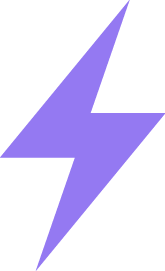

Running local mode, some functionality limited.



In [14]:
motif1 = [n for n in G.nodes() if G.node[n]['motif']=='1' ]
H = G.subgraph(motif1)
len(H.edges(data=True))

#convert to matrix
m = np.array(nx.to_numpy_matrix(H, weight='weight', nonedge=None))
m = (np.nanmax(m)-m) #Transform from weight to force.
m = np.nan_to_num(m)
m[0]

from lightning import Lightning
from numpy import random

color = [H.node[n]['color'] for n in H.nodes()]
color = [[int(c[1:3],16), int(c[3:5],16), int(c[5:7],16)] for c in color]

lgn = Lightning(ipython=True, local=True)
lgn.force(m, color=color)

D_top=0, example components, colors correspond to networks with functional loops.
<img src="5nodos/Dtop0_funloops.png">

Create network D_dyn=8

In [15]:
G = nx.read_edgelist('5nodos/edges_Ddyn8.csv', delimiter=',', nodetype=int, data=(('weight',int),))

#Default properies
for n in G.nodes(): 
    m = str(n)[0]
    G.node[n]['loop']=''
    G.node[n]['motif']=m
    G.node[n]['color']=colors[m]
#Add functional loops data
for n, l in loops.items():
    if n in G.nodes():
        G.node[n]['loop']=l
        G.node[n]['color']=colors[l]

len(G.nodes(data=True))

1872

Separate in components and determine loops by component

In [16]:
data = []
for sg in nx.connected_components(G):
    l = []
    if len(sg)==1: print(n)
    for n in sg:
        m = int(str(n)[0])
        l.append(  G.node[n]['loop']  )
    l = ''.join(sorted(l, reverse=True))
    data.append([m, len(sg), l])
len(data)

loops_comb = [d[2] for d in data]
loops_comb = {l:loops_comb.count(l) for l in set(loops_comb)}
del loops_comb[''] #remove non-loops
loops_comb = OrderedDict(sorted(loops_comb.items(), key=lambda t: t[0]))
len(loops_comb)

0

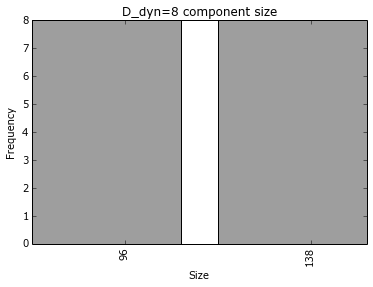

In [17]:
sizes = [d[1] for d in data]
sizes = {s:sizes.count(s) for s in set(sizes)}
sizes = OrderedDict(sorted(sizes.items(), key=lambda t: t[0]))
sizes

ind = np.arange(0,len(sizes),1)
plt.bar(ind, list(sizes.values()), color=colors['None'] )

plt.title("D_dyn=8 component size")
plt.xlabel("Size")
plt.xticks(ind+0.5, list(sizes.keys()), rotation='vertical')
plt.ylabel("Frequency")
#plt.legend((pi[0] for pi in p), reversed(ordl))
plt.show()

We'll focus in the motif 1 with distances from d_top


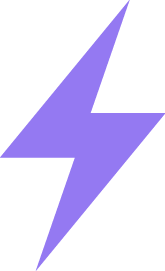

Running local mode, some functionality limited.



In [18]:
#convert to matrix
m = np.array(nx.to_numpy_matrix(G, weight='weight', nonedge=None))
m = (np.nanmax(m)-m) #Transform from weight to force.
m = np.nan_to_num(m)
m[0]

from lightning import Lightning
from numpy import random

color = [G.node[n]['color'] for n in G.nodes()]
color = [[int(c[1:3],16), int(c[3:5],16), int(c[5:7],16)] for c in color]

lgn = Lightning(ipython=True, local=True)
lgn.force(m, color=color)

D_dyn=8, example components, colors correspond to node motifs.
<img src="5nodos/Ddyn8_motifs.png">

Create network of only funtions

In [35]:
G = nx.read_edgelist('5nodos/edges_Dtop0.csv', delimiter=',', nodetype=int, data=(('weight',int),))

#Default properies
for n in G.nodes(): 
    G.node[n]['loop']=''
    G.node[n]['color']=colors['None']
    G.node[n]['motif']=str(n)[0]
#Add functional loops data
for n, l in loops.items():
    G.node[n]['loop']=l
    G.node[n]['color']=colors[l]

len(G.nodes(data=True))

20388

In [43]:
data = []
for sg in nx.connected_components(G):
    l = []
    for n in sg:
        m = int(str(n)[0])
        l.append(  G.node[n]['loop']  )
    l = ''.join(l)
    if l != '':  data += list(sg)
len(data)
data

Gf = G.subgraph(data)
Gf.nodes(data=True)

[(303104, {'color': '#80b1d3', 'loop': 'C', 'motif': '3'}),
 (303107, {'color': '#b3de69', 'loop': 'G', 'motif': '3'}),
 (303108, {'color': '#b3de69', 'loop': 'G', 'motif': '3'}),
 (303109, {'color': '#80b1d3', 'loop': 'C', 'motif': '3'}),
 (303110, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (400172, {'color': '#80b1d3', 'loop': 'C', 'motif': '4'}),
 (303112, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (303115, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (303116, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (303117, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (303118, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (303119, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (303120, {'color': '#80b1d3', 'loop': 'C', 'motif': '3'}),
 (303121, {'color': '#80b1d3', 'loop': 'C', 'motif': '3'}),
 (303122, {'color': '#9e9e9e', 'loop': '', 'motif': '3'}),
 (303123, {'color': '#80b1d3', 'loop': 'C', 'motif': '3'}),
 (303124, {'color': '#9e9e9e', 'loop': '', 'moti


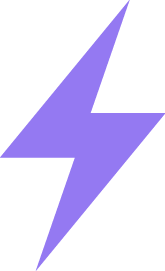

Running local mode, some functionality limited.



In [50]:
m = np.array(nx.to_numpy_matrix(Gf, weight='weight', nonedge=None))
m = (np.nanmax(m)-m) #Transform from weight to force.
m = np.nan_to_num(m)

color = [Gf.node[n]['color'] for n in Gf.nodes()]
color = [[int(c[1:3],16), int(c[3:5],16), int(c[5:7],16)] for c in color]

lgn = Lightning(ipython=True, local=True)
lgn.force(m/16, color=color)

In [49]:
set(m.flatten()/16)

{0.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0}

## Dendogram

Clustering!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Edges in the network with different cuts

```
0	([])
8	([11, 33, 44, 22])
16	([11, 33, 44, 22])
24	([11, 12, 22, 33, 44, 34])
32	([11, 24, 13, 12, 22, 33, 44, 34])
40	([11, 12, 22, 33, 44, 34])
48	([11, 24, 13, 12, 22, 33, 44, 34])
56	([11, 12, 22, 33, 44, 34])
64	([11, 24, 13, 12, 22, 33, 44, 34])
72	([11, 12, 22, 33, 44, 34])
80	([11, 24, 13, 12, 22, 33, 44, 34])
88	([11, 24, 13, 12, 22, 33, 44, 34])
96	([11, 24, 13, 12, 14, 22, 23, 33, 44, 34])
104	([11, 24, 13, 12, 22, 33, 44, 34])
112	([11, 24, 13, 12, 14, 22, 23, 33, 44, 34])
120	([11, 24, 13, 12, 14, 22, 23, 33, 44, 34])
128	([11, 24, 13, 12, 14, 22, 23, 33, 44, 34])
```